### 1. Load CATPCHA images and get the transformed (X,y) data

In [1]:
import torch

from helper_functions.data_transformation import get_transformed_data_v1_proportionate, get_transformed_data_for_captcha_evaluation_v1_proportionate

train_folder = "../data/train/combine2"
test_folder = "../data/test/combine2"
cached_data_path = "../data/prepared_data_cnn_v3.4_proportionate.pth"

try:
    # Load the prepared data from cache if it already exists
    X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info = torch.load(cached_data_path)
    print("Loaded prepared data from cache.")

except FileNotFoundError:
    # Else prepare the data and save it
    X_train, y_train = get_transformed_data_v1_proportionate(train_folder, is_train=True)
    X_test, y_test = get_transformed_data_v1_proportionate(test_folder, is_train=False)
    X_test_captcha, y_test_captcha, failed_segmentation_info = get_transformed_data_for_captcha_evaluation_v1_proportionate(test_folder)

    torch.save((X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info), cached_data_path)
    print("Saved prepared data to cache.")


Loaded prepared data from cache.


### 2. Instantiate basic CNN model and train it

In [2]:
from models.cnn_v3 import CNN, CNNParams
from helper_functions.data_transformation import IMG_HEIGHT, IMG_WIDTH


# Instantiate model
cnn_params: CNNParams = {
    "num_classes": 36,
    "input_shape": (1, IMG_HEIGHT, IMG_WIDTH), # (channels, height, width)
    "learning_rate": 1.1*1e-3,
    "num_epochs": 30,
    "batch_size": 250,
}
cnn = CNN(cnn_params)

# Train model
cached_model_path = "../trained_models/cnn_v3.4_proportionate.pth"
try:
    # Load the trained model from cache if it already exists
    cnn.load_trained_model(cached_model_path)
except FileNotFoundError:
    # Else train the model and save it
    cnn.train_model(X_train, y_train)
    cnn.save_trained_model(cached_model_path)


Trained model (took 13m 5s) has the saved epoch losses: 
Epoch 1, Loss: 1.2472147353879222
Epoch 2, Loss: 0.6311248230350601
Epoch 3, Loss: 0.4939802120198737
Epoch 4, Loss: 0.4159582290616069
Epoch 5, Loss: 0.35521591418272963
Epoch 6, Loss: 0.3214108035280988
Epoch 7, Loss: 0.27155966598253983
Epoch 8, Loss: 0.23144223608753897
Epoch 9, Loss: 0.2103843365932678
Epoch 10, Loss: 0.18963866779854247
Epoch 11, Loss: 0.16279296489705988
Epoch 12, Loss: 0.14286452500553398
Epoch 13, Loss: 0.1365938092601466
Epoch 14, Loss: 0.12812884112859105
Epoch 15, Loss: 0.14322739115336558
Epoch 16, Loss: 0.10490002235645181
Epoch 17, Loss: 0.06704023898533591
Epoch 18, Loss: 0.049873341656439786
Epoch 19, Loss: 0.04642419806206143
Epoch 20, Loss: 0.03946913134020109
Epoch 21, Loss: 0.03500604674454544
Epoch 22, Loss: 0.028788275638972963
Epoch 23, Loss: 0.023058146277403498
Epoch 24, Loss: 0.023108909290830988
Epoch 25, Loss: 0.021551369861992714
Epoch 26, Loss: 0.016841971724118283
Epoch 27, Loss: 0

### 3. Evaluate CNN model

Character level performance (skipping SF): {
  "accuracy": 0.924,
  "precision": 0.923,
  "recall": 0.923,
  "f1_score": 0.923
}

Captcha level performance: {
  "segmentation_accuracy": 0.934,
  "captcha_accuracy (skipping SF)": 0.698,
  "captcha_accuracy (including SF)": 0.652,
  "character_accuracy (including SF)": 0.864
}

Confusion matrix for individual characters (skipping SF):


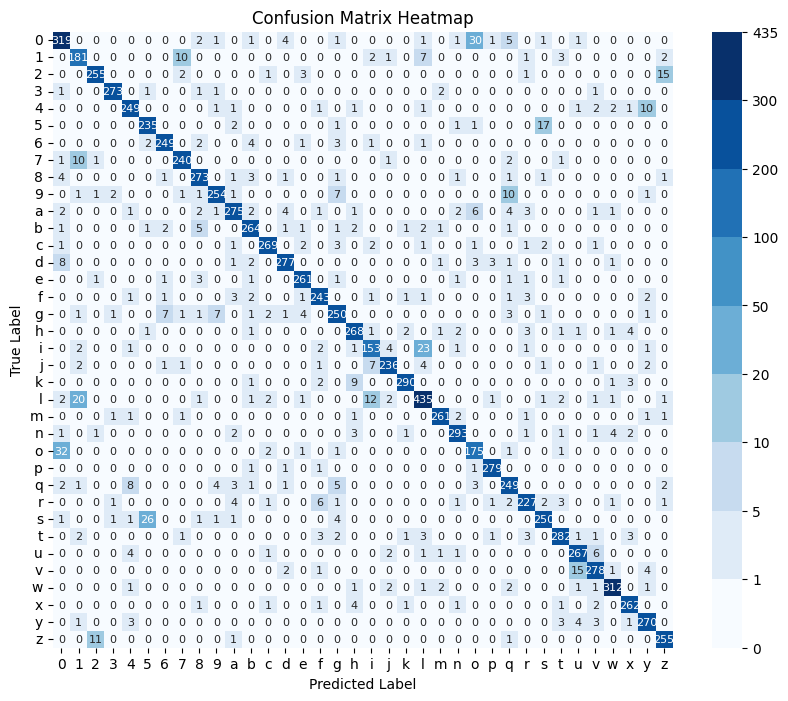

Individual character performance and top confusions (skipping SF):


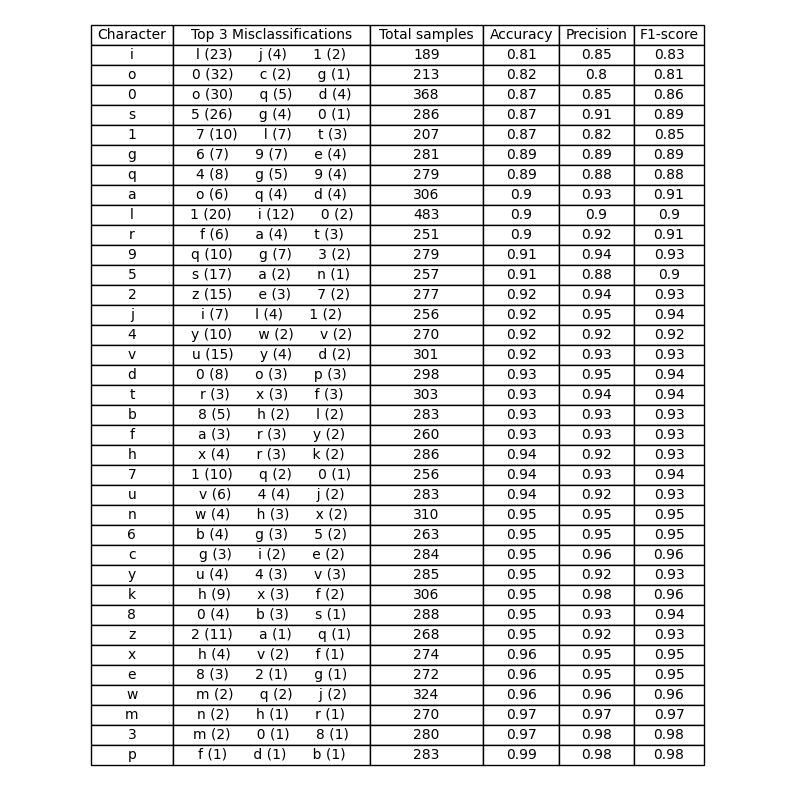

In [3]:
from helper_functions.evaluation import evaluate_character_performance, evaluate_captcha_performance, evaluate_individual_character_performance

evaluate_character_performance(cnn.model, X_test, y_test)
evaluate_captcha_performance(cnn.model, X_test_captcha, y_test_captcha, failed_segmentation_info)
evaluate_individual_character_performance(cnn.model, X_test, y_test)